In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/drive
/content/drive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [4]:
df = pd.read_csv('data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.groupby('Geography').count()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [6]:
# lb = LabelEncoder()
# df.Gender = lb.fit_transform(df.Gender)

In [110]:
X = df.iloc[:, 3:13].values # input
y = df.iloc[:, 13].values # output

In [111]:
# khách hàng ra đi
exited = np.count_nonzero(y)
no_exited = y.shape[0] - exited
exited, no_exited

(2037, 7963)

In [112]:
# cách 2:))
from scipy.stats import itemfreq
itemfreq(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:     `itemfreq` is deprecated!
    `itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([[   0, 7963],
       [   1, 2037]])

In [113]:
X[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

### **Feature Enginerring**

In [114]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [115]:
lb_X_1 = LabelEncoder()
X[:, 1] = lb_X_1 .fit_transform(X[:, 1])

lb_X_2 = LabelEncoder()
X[:, 2] = lb_X_2 .fit_transform(X[:, 2])

# OneHotEncoder() cho column [1]
#  remainder="passthrough": 
ct = ColumnTransformer([("encoder", OneHotEncoder(), [1])], remainder="passthrough")


X = ct.fit_transform(X.tolist())

In [116]:
X[:10]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [117]:
X = X[:, 1:] # vd nói chung nó là drop_first = True trong getdummies á)

In [118]:
X[:10]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [92]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc = StandardScaler()
# sc.fit(X)
# X = sc.transform(X)

X = sc.fit_transform(X)

In [47]:
# # giả bộ lưu lại
# import pickle
# scalerfile = 'sc.sav'
# pickle.dump(sc,(open(scalerfile, 'wb')))

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
def build_ANN():
    model = keras.Sequential()
    # add first layer and first hidden layer
    model.add(layers.Dense(units=6, activation="relu", input_shape=(11,))) 
    model.add(layers.Dropout(0.2))

    # add second hidden layer
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dropout(0.2))

    # add output layer
    model.add(layers.Dense(units = 1, activation='sigmoid'))

    # compiling ANN
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ['accuracy'])

    return model

In [50]:
classifier = build_ANN()
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [51]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

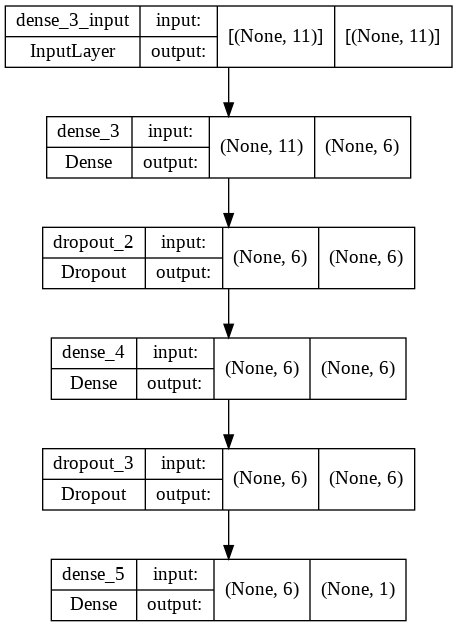

In [52]:
plot_model(classifier, to_file='ANN_model.png', show_shapes=True)
Image(filename='ANN_model.png')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience=20, 
    restore_best_weights = True
)

In [53]:
history = classifier.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 # turn off training log
)


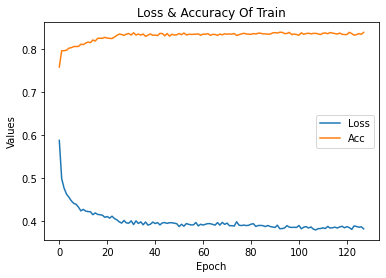

In [54]:
# loss và acc của train
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy Of Train')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()


In [55]:
'''
ACC sẽ tăng dần, khoảng trên 0.8
loss giảm dần tới 0.4
'''

'\nACC sẽ tăng dần, khoảng trên 0.8\nloss giảm dần tới 0.4\n'

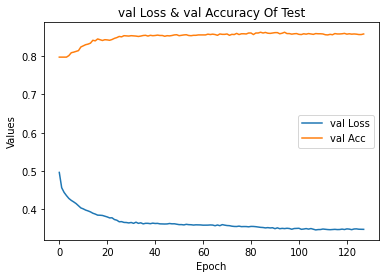

In [56]:
# loss và acc của test
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('val Loss & val Accuracy Of Test')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['val Loss', 'val Acc'])
plt.show()

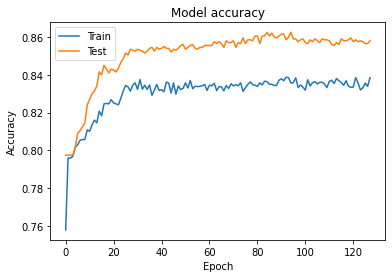

In [57]:
plt.figure()
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


### **Đánh giá model**

In [58]:
y_test[:5]

array([0, 1, 0, 0, 0])

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
y_pred[:5] 

array([[0.23887026],
       [0.26805553],
       [0.16382357],
       [0.06566152],
       [0.13076389]], dtype=float32)

In [61]:
y_pred = y_pred >=0.5

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1540,   55],
       [ 227,  178]])

In [ ]:
'''
trong số 1540 + 55 khách hàng ở lại (nhóm 0), model dự đoán đúng 1540 cases, 55 case sai
trong số 227  +  178 khách hàng ra đi (nhóm 1), model dự đoán đúng 178 cases, 227 case sai


'''

'\nvới 1582 khách hàng ở lại, dự đoán sai 13 khách hàng\nvới 1582 khách hàng ra đi, dự đoán sai 94 khách hàng\n\n'

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.76      0.44      0.56       405

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
# Evaluation
print("Accuracy:", classifier.evaluate(X_test, y_test))


63/63 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8380
Accuracy: [0.40189579129219055, 0.8379999995231628]


In [ ]:
'''
mặc dù acc cao nhưng f1_score của 1 thấp do data giữa các nhóm 0, 1 bị mất cân bằng
=> xử lý dữ liệu mất cân bằng bằng under_sampling hoặc over_sampling
'''

'\nmặc dù acc cao nhưng f1_score của 1 thấp do data giữa các nhóm 0, 1 bị mất cân bằng\n=> xử lý dữ liệu mất cân bằng\n'

### **Under_sampling**
- giảm bớt dữ liệu của nhóm cao hơn

In [65]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [66]:
rs = RandomUnderSampler()
X_rs, y_rs = rs.fit_resample(X_train, y_train)
print(sorted(Counter(y_rs).items()))

[(0, 1632), (1, 1632)]


In [67]:
classifier_1 = build_ANN()

In [68]:
history_1 = classifier_1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 # turn off training log
)


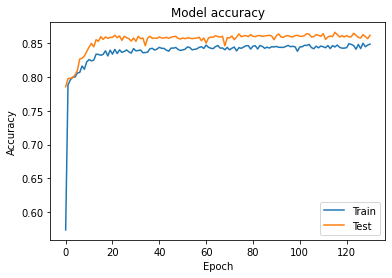

In [69]:
plt.figure()
plt.plot(history_1.history['accuracy']) 
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


In [70]:
y_pred = classifier_1.predict(X_test)
y_pred = y_pred >=0.5
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))
print("Accuracy:", classifier_1.evaluate(X_test, y_test))


[[1574   21]
 [ 251  154]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1595
           1       0.88      0.38      0.53       405

    accuracy                           0.86      2000
   macro avg       0.87      0.68      0.73      2000
weighted avg       0.87      0.86      0.84      2000

63/63 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8640
Accuracy: [0.34695276618003845, 0.8640000224113464]


In [71]:
'''
dù acc model này thấp hơn nhưng phần dự đoán khách hàng ra đi dc cải thiện hơn
'''

'\ndù acc model này thấp hơn nhưng phần dự đoán khách hàng ra đi dc cải thiện hơn\n'

### **Over Sampling**

In [72]:
from imblearn.over_sampling import SMOTE
X_S, y_S = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_S).items()))

[(0, 6368), (1, 6368)]


In [73]:
classifier_2 = build_ANN()

In [74]:
history_2 = classifier_2.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 # turn off training log
)


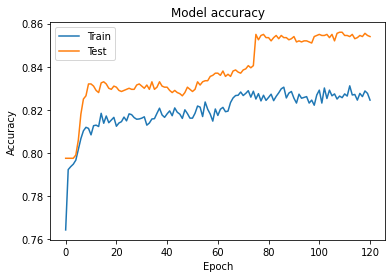

In [75]:
plt.figure()
plt.plot(history_2.history['accuracy']) 
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [76]:
y_pred = classifier_2.predict(X_test)
y_pred = y_pred >=0.5
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))
print("Accuracy:", classifier_2.evaluate(X_test, y_test))


[[1542   53]
 [ 237  168]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1595
           1       0.76      0.41      0.54       405

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.85      0.84      2000

63/63 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8550
Accuracy: [0.37243467569351196, 0.8550000190734863]


In [82]:
classifier_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dropout_5 (Dropout)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


#### **Predict**

In [120]:
new_pred = classifier_1.predict(sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_pred = new_pred >=0.5
new_pred

array([[False]])

### **Lưu model**

In [121]:
# from tensorflow.keras.models imports load_model
# classifier_1.save('Chapter_3_ANN/classification_demo/model/binary_model.h5')

In [105]:
# save scaler
import joblib
joblib.dump(sc, 'Chapter_3_ANN/classification_demo/model/sc.sav')


['Chapter_3_ANN/classification_demo/model/sc.sav']

In [106]:
scaler = joblib.load('Chapter_3_ANN/classification_demo/model/sc.sav') 

In [108]:
new_pred = classifier_1.predict(scaler.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

In [109]:
new_pred = new_pred >=0.5
new_pred

array([[False]])